In [1]:
import sys 
import os

# Add the parent directory to the path if it's not already there
if os.path.abspath('..') not in sys.path:
    sys.path.append(os.path.abspath('..'))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src import DDQL, MarketEnvironnement
import matplotlib.pyplot as plt

In [48]:
me = MarketEnvironnement(initial_inventory=100)



In [64]:
me.reset()

In [72]:
rewards = []
for _ in range(10000):
    while not me.done:
        x = np.random.randint(0, me.state['inventory']+1)
        me.step(x)
    rewards.append(me.state['reward'])
    me.reset()

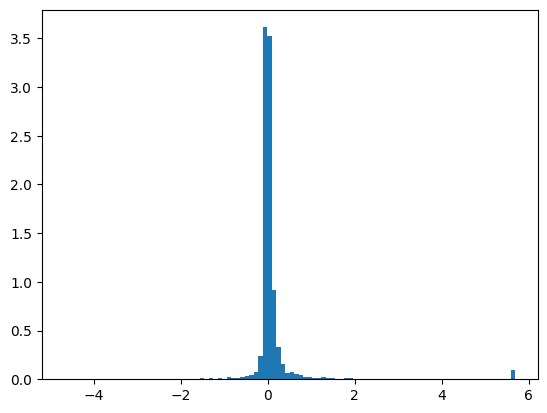

mean reward: 0.08823779078128062
std reward: 0.680772062349897


In [77]:
#distribution of rewards
plt.hist(rewards, bins=100, density=True)
plt.show()

print(f"mean reward: {np.mean(rewards)}")
print(f"std reward: {np.std(rewards)}")

In [43]:

# Draft Martial

import pandas as pd
import numpy as np

def fake_data(S : float = 100, r : float = 0.1, sigma : float = 0.2):
    # Creation of the dataset output
    data = pd.DataFrame(pd.date_range(start='2022-01-01 11:00:01', end='2022-01-01 13:00:00', freq = "s"), columns=['Date'])
    num_points, _ = np.shape(data)

    # Simulate a Black-Scholes trajectory
    dt = 1/252/6.5/3600 # scale of a second
    drift = (r - 0.5 * sigma**2) * dt
    diffusion = sigma * np.sqrt(dt) * np.random.normal(size=num_points - 1)
    log_returns = np.concatenate([[0], drift + diffusion])
    log_prices = np.cumsum(log_returns)
    prices = S * np.exp(log_prices)
    
    data["Price"] = prices
    data.set_index('Date', inplace=True)


    return data


In [44]:
a, b, c = fake_data(), fake_data(), fake_data()

In [45]:
a.to_csv('../data/historical_data.csv')

In [71]:
print(next(enumerate(np.split(a, 10))))

(0,                           Price
Date                           
2022-01-01 11:00:01  100.000000
2022-01-01 11:00:02   99.997536
2022-01-01 11:00:03  100.004751
2022-01-01 11:00:04  100.019533
2022-01-01 11:00:05  100.018362
...                         ...
2022-01-01 11:11:56  100.101370
2022-01-01 11:11:57  100.101435
2022-01-01 11:11:58  100.100410
2022-01-01 11:11:59  100.104073
2022-01-01 11:12:00  100.111706

[720 rows x 1 columns])


In [42]:
a.values

array([[100.        ],
       [100.00866308],
       [100.01940408],
       ...,
       [ 99.23107155],
       [ 99.2341913 ],
       [ 99.22637508]])